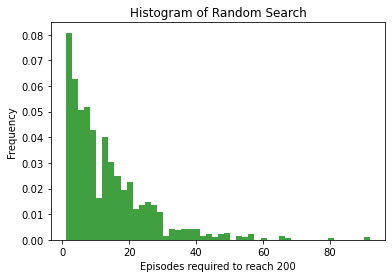

13.289


In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def run_episode(env, parameters):
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1    #Tells the agent which direction to go, left or right
        observation, reward, done, info = env.step(action)
        totalreward += reward                                         #Gain a reward for keeping balanced
        if done:
            break
    return totalreward                                                #Gives us the total rewards, indicating how well it did

def train(submit):
    env = gym.make('CartPole-v0')                                   #Setting up the environment 
    if submit:
        env.monitor.start('cartpole-experiments/', force=True)

    counter = 0
    bestparams = None
    bestreward = 0
    for _ in range(10000):                                         #try random strategies and pick the best one.
        counter += 1
        parameters = np.random.rand(4) * 2 - 1
        reward = run_episode(env,parameters)
        if reward > bestreward:
            bestreward = reward
            bestparams = parameters
            if reward == 200:
                break

    if submit:
        for _ in range(100):
            run_episode(env,bestparams)
        env.monitor.close()

    return counter



                                                                # uses matplotlib to graph the results
results = []
for _ in range(1000):
    results.append(train(submit=False))

plt.hist(results,50,density=1, facecolor='g', alpha=0.75)
plt.xlabel('Episodes required to reach 200')
plt.ylabel('Frequency')
plt.title('Histogram of Random Search')
plt.show()

print (np.sum(results) / 1000.0)